# Parametric Variational Method (Atomic Units)

## Trial Wavefunction Selection

To approximate the hydrogen atom's ground state, we use a **Gaussian trial wavefunction**:

$$
\psi_{\alpha}(r) = N e^{-\alpha r^2}
$$

where $\alpha$ is the variational parameter, and $N$ is the normalization constant.

## Normalization of the Trial Function

The wavefunction must satisfy the normalization condition:

$$
\int_0^\infty |\psi_{\alpha}(r)|^2 \, 4\pi r^2 \, dr = 1
$$

Substituting $\psi_{\alpha}(r)$:

$$
N^2 \int_0^\infty e^{-2\alpha r^2} \, 4\pi r^2 \, dr = 1
$$

We thus obtain the following normalization constant:

$$
N = \left(\frac{2\alpha}{\pi}\right)^{3/4}
$$

Thus, the properly normalized wavefunction is:

$$
\psi_{\alpha}(r) = \left(\frac{2\alpha}{\pi}\right)^{3/4} e^{-\alpha r^2}
$$

## Expectation Value of the Kinetic Energy

In atomic units, the kinetic energy operator simplifies to:

$$
\hat{T} = -\frac{1}{2} \nabla^2
$$

The expectation value becomes:

$$
\langle T \rangle = \int_0^\infty \psi_{\alpha}^*(r) \left( -\frac{1}{2} \nabla^2 \right) \psi_{\alpha}(r) \, 4\pi r^2 \, dr
$$

Evaluating the Laplacian and solving the integral gives:

$$
\langle T \rangle = \frac{3}{2} \alpha
$$

## Expectation Value of the Potential Energy

The Coulomb potential in atomic units is:

$$
V(r) = -\frac{1}{r}
$$

So the expectation value becomes:

$$
\langle V \rangle = \int_0^\infty \psi_{\alpha}^*(r) \left( -\frac{1}{r} \right) \psi_{\alpha}(r) \, 4\pi r^2 \, dr
$$

Evaluating this integral yields:

$$
\langle V \rangle = -2 \sqrt{\frac{\alpha}{\pi}}
$$

## Total Energy Expression

The total energy is given by:

$$
E(\alpha) = \langle T \rangle + \langle V \rangle
$$

Substituting the results:

$$
E(\alpha) = \frac{3}{2} \alpha -2 \sqrt{\frac{\alpha}{\pi}}
$$

This expression can now be minimized with respect to $\alpha$ to obtain the best approximation to the ground-state energy of the hydrogen atom using a Gaussian trial wavefunction.

## Interactive Visualization of the Variational Method

The code below showcases an interactive **slider** that allows adjustment of the **variational parameter** $\alpha$. By modifying $\alpha$, you can observe how it affects:
- The shape of the **Gaussian trial wavefunction** compared to the exact solution.
- The computed **variational energy**.
- The **residuals**, showing the deviation of the trial function from the exact wavefunction.

The **best approximation** occurs when $\alpha$ minimizes the **total energy**.

**NOTE**: The best approximation does not necessarily yield the best overlap with the exact solution.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate as integrate
import ipywidgets as widgets
from IPython.display import display

def psi_gaussian(r, alpha):
    """
    Normalized trial wave function to approximate the solution
    """
    N = (2 * alpha / np.pi) ** (3/4)  # Normalization factor
    return N * np.exp(-alpha * r**2)

def psi_exact(r):
    """
    Exact ground state solution
    """
    return (1 / np.sqrt(np.pi)) * np.exp(-r)

def total_energy(alpha):
    """
    Energy of the system as function of the alpha parameter
    """
    return 4 * np.pi * (3*alpha/8/np.pi - np.sqrt(alpha) / np.sqrt(2) / np.pi**(3/2))

# Interactive visualization
def update(alpha):
    r_vals = np.linspace(0, 5, 100)
    psi_vals = psi_gaussian(r_vals, alpha)
    psi_exact_vals = psi_exact(r_vals)
    residuals = psi_vals - psi_exact_vals
    residual_sum_squared = np.sum(residuals**2)
    
    energy = total_energy(alpha)
    
    fig, axs = plt.subplots(1, 2, figsize=(8, 3))
    
    # Plot trial and exact wavefunctions
    axs[0].plot(r_vals, psi_vals, label=f'Gaussian ψ(r), α={alpha:.2f}', linestyle='dashed')
    axs[0].plot(r_vals, psi_exact_vals, label='Exact Hydrogen ψ(r)', linestyle='solid')
    axs[0].set_xlabel('r')
    axs[0].set_ylabel('ψ(r)')
    axs[0].set_title(f'Wavefunction Comparison (α={alpha:.2f})')
    axs[0].legend()
    axs[0].grid(True)
    
    # Plot residuals
    axs[1].plot(r_vals, residuals, label='Residuals: Gaussian - Exact', color='red')
    axs[1].set_xlabel('r')
    axs[1].set_ylabel('Residual')
    axs[1].set_title('Residuals (Deviation from Exact Solution)')
    axs[1].legend()
    axs[1].grid(True)
    
    plt.tight_layout()
    plt.show()
    
    print(f'For α = {alpha:.2f}, the variational energy is: E(α) = {energy:.4f} Ht, Sum of squared residuals: {residual_sum_squared:.4f}')

# Interactive slider
alpha_slider = widgets.FloatSlider(value=1.0, min=0.1, max=1.0, step=0.01, description='α')
widgets.interactive(update, alpha=alpha_slider)

interactive(children=(FloatSlider(value=1.0, description='α', max=1.0, min=0.1, step=0.01), Output()), _dom_cl…

# Analytical Minimization of the Energy Function

To find the optimal value of $\alpha$ that minimizes the total energy, we take the first derivative of $E(\alpha)$ and set it equal to zero.

## Energy Function
The total energy function is given by:

$$
E(\alpha) = \frac{3}{2} \alpha -2 \sqrt{\frac{\alpha}{\pi}}
$$

## Compute the First Derivative
We differentiate $E(\alpha)$ with respect to $\alpha$:

$$
\frac{dE}{d\alpha} = \frac{3}{2} - \sqrt{\frac{2}{\pi\alpha}}
$$

## Solve for Optimal $\alpha$
Setting $\frac{dE}{d\alpha} = 0$, we solve for $\alpha$ and find:

$$
\alpha^* = \frac{8}{9\pi}
$$

In the script below, we explore the energy as function of $\alpha$ and use a numerical method to find the best $\alpha$ that minimizes the energy.

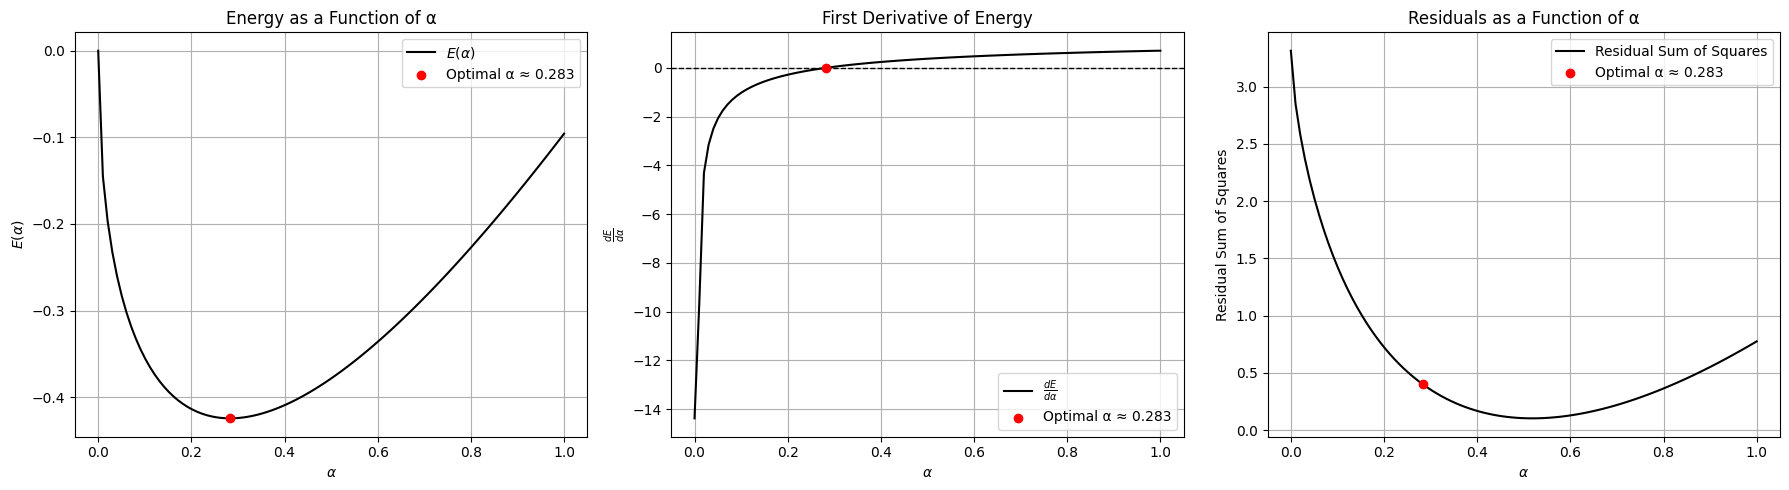

The optimal α that minimizes the energy is approximately: 0.28294
The sum of squared residuals at optimal α is: 0.40179


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize_scalar

# Define the total energy function
def total_energy(alpha):
    """
    Energy of the system as function of the alpha parameter
    """
    return 4 * np.pi * (3 * alpha / (8 * np.pi) - np.sqrt(alpha) / np.sqrt(2) / np.pi**(3/2))

# Define the residual sum of squares function
def residual_sum_squared(alpha):
    r_vals = np.linspace(0, 5, 100)
    psi_vals = psi_gaussian(r_vals, alpha)
    psi_exact_vals = psi_exact(r_vals)
    residuals = psi_vals - psi_exact_vals
    return np.sum(residuals**2)

# Define the range of alpha values
alpha_vals = np.linspace(0, 1, 100)

# Compute energy, its derivative, and residual sum of squares
energy_vals = total_energy(alpha_vals)
energy_derivative = np.gradient(energy_vals, alpha_vals)
residuals_vals = np.array([residual_sum_squared(alpha) for alpha in alpha_vals])

# Find the optimal alpha that minimizes energy
opt_result = minimize_scalar(total_energy, bounds=(0, 1), method='bounded')
optimal_alpha = opt_result.x
optimal_energy = total_energy(optimal_alpha)
optimal_residuals = residual_sum_squared(optimal_alpha)

# Create a figure with three side-by-side plots
fig, axs = plt.subplots(1, 3, figsize=(18, 5))

# Plot energy as a function of alpha
axs[0].plot(alpha_vals, energy_vals, label=r"$E(\alpha)$", color='black')
axs[0].scatter(optimal_alpha, optimal_energy, color='red', zorder=3, label=f"Optimal α ≈ {optimal_alpha:.3f}")
axs[0].set_xlabel(r"$\alpha$")
axs[0].set_ylabel(r"$E(\alpha)$")
axs[0].set_title("Energy as a Function of α")
axs[0].grid(True)
axs[0].legend()

# Plot first derivative of energy as a function of alpha
axs[1].plot(alpha_vals, energy_derivative, label=r"$\frac{dE}{d\alpha}$", color='black')
axs[1].axhline(0, color='black', linestyle='dashed', linewidth=1)
axs[1].scatter(optimal_alpha, 0, color='red', zorder=3, label=f"Optimal α ≈ {optimal_alpha:.3f}")
axs[1].set_xlabel(r"$\alpha$")
axs[1].set_ylabel(r"$\frac{dE}{d\alpha}$")
axs[1].set_title("First Derivative of Energy")
axs[1].grid(True)
axs[1].legend()

# Plot sum of squared residuals as a function of alpha
axs[2].plot(alpha_vals, residuals_vals, label=r"Residual Sum of Squares", color='black')
axs[2].scatter(optimal_alpha, optimal_residuals, color='red', zorder=3, label=f"Optimal α ≈ {optimal_alpha:.3f}")
axs[2].set_xlabel(r"$\alpha$")
axs[2].set_ylabel("Residual Sum of Squares")
axs[2].set_title("Residuals as a Function of α")
axs[2].grid(True)
axs[2].legend()

# Display the plots
plt.tight_layout()
plt.show()

# Print optimal value
print(f"The optimal α that minimizes the energy is approximately: {optimal_alpha:.5f}")
print(f"The sum of squared residuals at optimal α is: {optimal_residuals:.5f}")